<a href="https://colab.research.google.com/github/Nagendrareddy777/Deeplearning_Tasks/blob/main/Transfer_learning_vgg(without_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 188MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [4]:
import zipfile
zip_ref=zipfile.ZipFile("/content/dogs-vs-cats.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

##Building the model by using VGG16(Visually Geometry Group 16) Architecture

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np


In [6]:
conv_base=VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150,150,3)
    )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

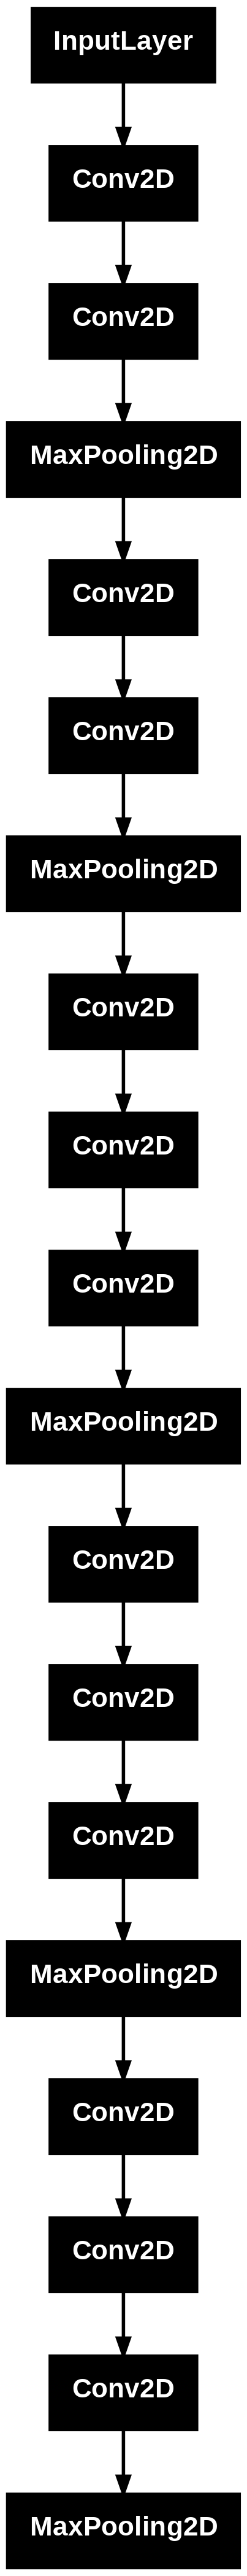

In [8]:
from keras.utils import plot_model
plot_model(conv_base)

In [9]:
model=Sequential()

model.add(conv_base)

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

dummy_data=np.random.rand(1,150,150,3)
model.predict(dummy_data,verbose=0)


array([[0.7765807]], dtype=float32)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (1, 4, 4, 512)              │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (1, 8192)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 256)                    │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 1)                      │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

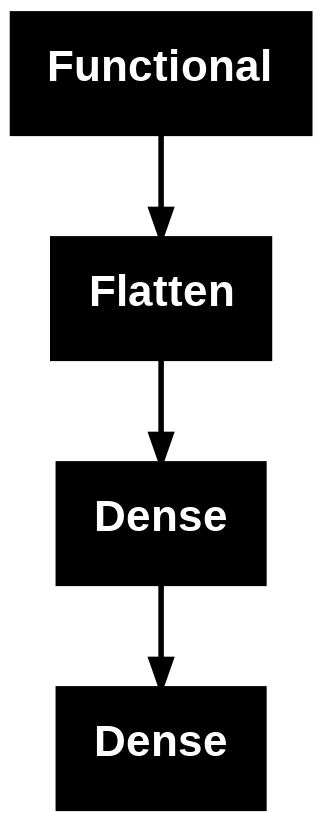

In [11]:
plot_model(model)

In [12]:
conv_base.trainable=False

In [13]:
#generator

train_ds=keras.utils.image_dataset_from_directory(
    "/content/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    "/content/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [14]:
#Normalize the images

def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 69s 93ms/step - accuracy: 0.8509 - loss: 0.3838 - val_accuracy: 0.9010 - val_loss: 0.2266
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9169 - loss: 0.1942 - val_accuracy: 0.9198 - val_loss: 0.2015
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9306 - loss: 0.1612 - val_accuracy: 0.9176 - val_loss: 0.1989
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 94s 103ms/step - accuracy: 0.9458 - loss: 0.1336 - val_accuracy: 0.9106 - val_loss: 0.2199
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 85ms/step - accuracy: 0.9569 - loss: 0.1063 - val_accuracy: 0.8970 - val_loss: 0.2666
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9650 - loss: 0.0882 - val_accuracy: 0.8994 - val_loss: 0.2983
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.9711 - loss: 0.0698 - val_accuracy: 0.9136 - val_loss: 0.2704
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 101ms/step - accuracy: 0.9823 - loss: 0.0470 

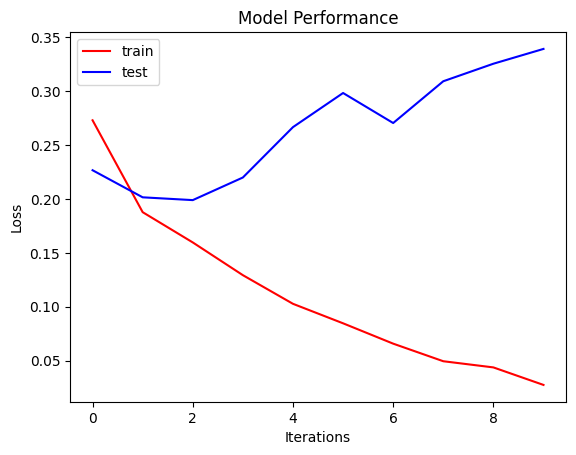

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="train")
plt.plot(history.history["val_loss"],color="blue",label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Model Performance")
plt.show()

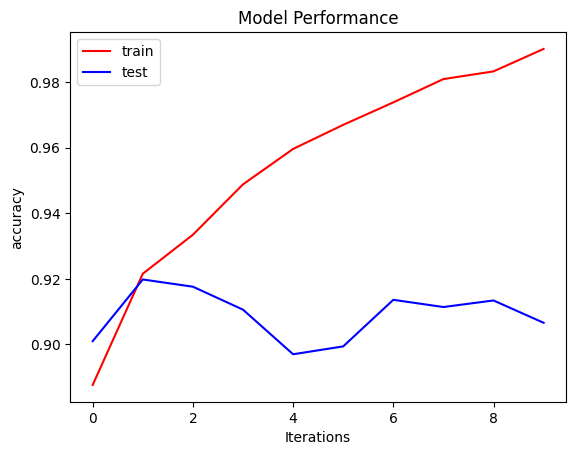

In [20]:
plt.plot(history.history["accuracy"],color="red",label="train")
plt.plot(history.history["val_accuracy"],color="blue",label="test")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("accuracy")
plt.title("Model Performance")
plt.show()